In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

penguins = sns.load_dataset("penguins")
penguins = penguins.fillna(value={'bill_length_mm': 0, 'bill_depth_mm': 0, 'flipper_length_mm': 0, 'body_mass_g': 0, 'sex':'Unkown'})
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             0.0            0.0                0.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          0.0  Unkown  
4       3450.0  Female

In [9]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['sex'], random_state=42)
(penguins_train.shape, penguins_test.shape)

((240, 7), (104, 7))

In [26]:
from sklearn.tree import DecisionTreeRegressor
features= ['bill_depth_mm']
dt_regression = DecisionTreeRegressor(max_depth = 10) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['bill_length_mm'])

DecisionTreeRegressor(max_depth=10)

In [29]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

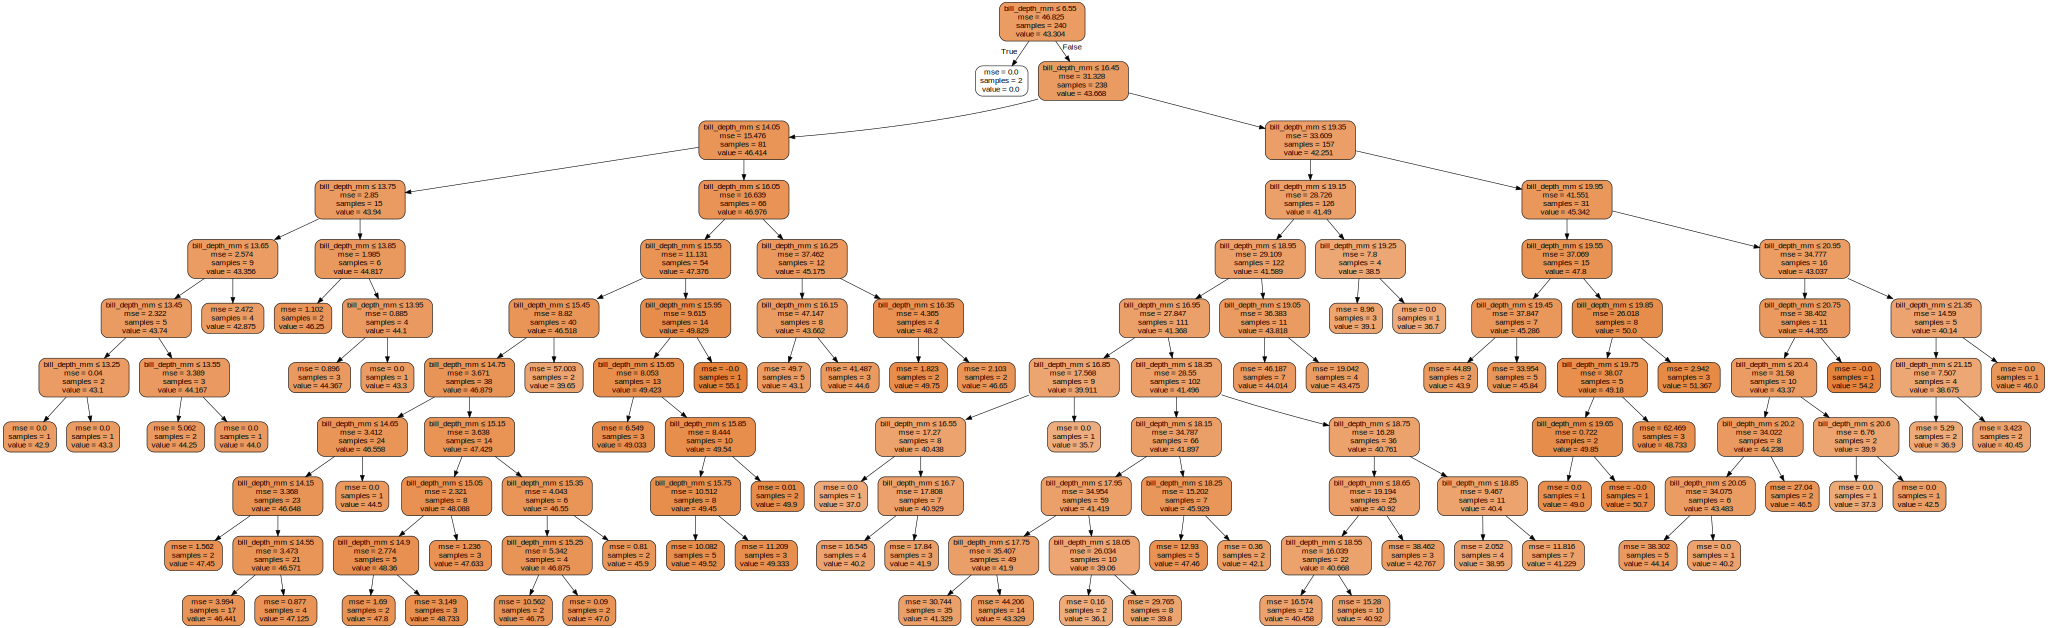

In [30]:
plot_tree_regression(dt_regression, features)

In [27]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [28]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.bill_length_mm)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.bill_length_mm)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 4.358430065982018
RMSE on test set 5.665291549231049
